In [28]:
!pip install yfinance


Defaulting to user installation because normal site-packages is not writeable


In [29]:
import pandas as pd
import yfinance as yf
import datetime
from datetime import date, timedelta
today = date.today()

d1 = today.strftime("%Y-%m-%d")
end_date = d1
d2 = date.today() - timedelta(days=720)
d2 = d2.strftime("%Y-%m-%d")
start_date = d2

data = yf.download('AAPL', 
                      start=start_date, 
                      end=end_date, 
                      progress=False)
print(data.head())

Price            Close        High         Low        Open    Volume
Ticker            AAPL        AAPL        AAPL        AAPL      AAPL
Date                                                                
2024-01-26  190.619797  192.937901  190.144292  192.452495  44594000
2024-01-29  189.936234  190.401838  187.806354  190.213613  47145600
2024-01-30  186.280792  190.005625  185.716133  189.153670  55859400
2024-01-31  182.674835  185.349587  182.625315  185.290136  55467800
2024-02-01  185.111832  185.200986  182.100279  182.268687  64885400


In [30]:
print(data.columns)


MultiIndex([( 'Close', 'AAPL'),
            (  'High', 'AAPL'),
            (   'Low', 'AAPL'),
            (  'Open', 'AAPL'),
            ('Volume', 'AAPL')],
           names=['Price', 'Ticker'])


In [7]:
figure = px.line(
    x=data.index,
    y=data["Close"],
    title="Time Series Analysis (Line Plot)"
)
figure.show()
#i am not removing this cell as it is important for my learning step.

ValueError: Data must be 1-dimensional, got ndarray of shape (494, 1) instead

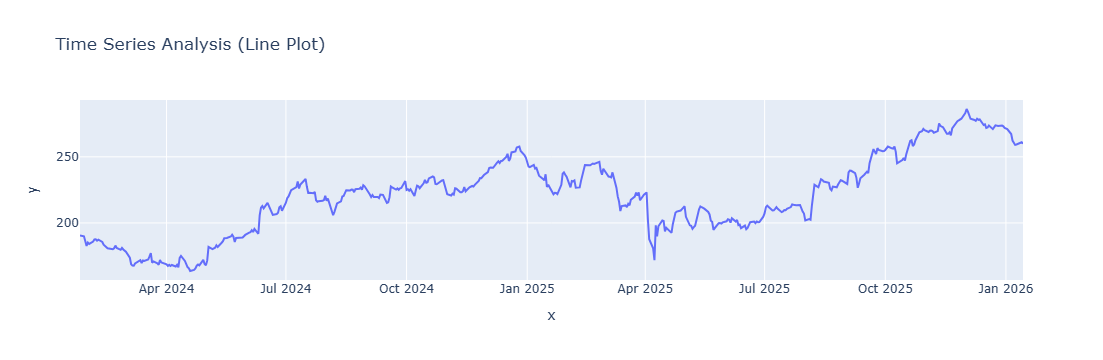

In [10]:
close_series = data[("Close", "AAPL")]

import plotly.express as px

figure = px.line(
    x=close_series.index,
    y=close_series,
    title="Time Series Analysis (Line Plot)"
)
figure.show()


In [14]:

data.columns = data.columns.droplevel(1)



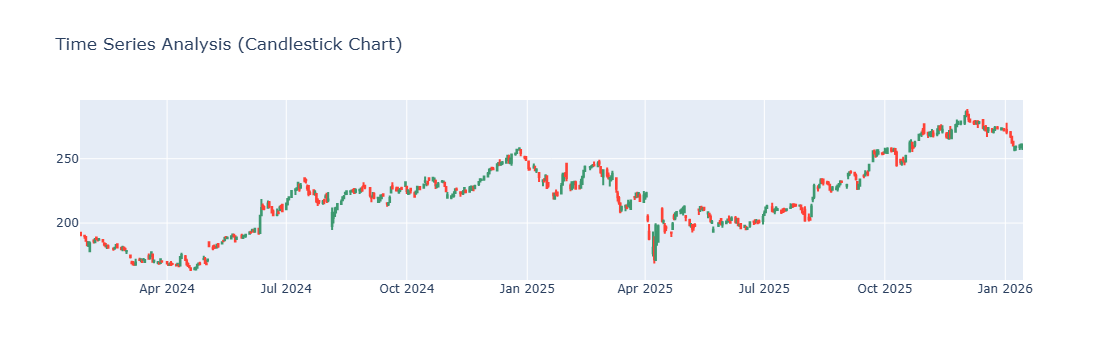

In [27]:
import plotly.graph_objects as go

figure = go.Figure(
    data=[go.Candlestick(
        x=data.index,
        open=data["Open"],
        high=data["High"],
        low=data["Low"],
        close=data["Close"]
    )]
)

figure.update_layout(
    title="Time Series Analysis (Candlestick Chart)",
    xaxis_rangeslider_visible=False
)

figure.show()


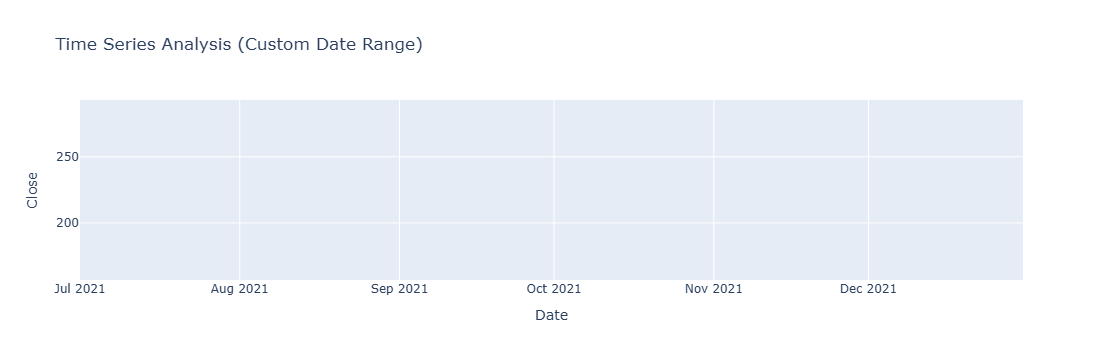

In [25]:
figure = px.line(data, x = data.index, 
                 y = 'Close', 
                 range_x = ['2021-07-01','2021-12-31'], 
                 title = "Time Series Analysis (Custom Date Range)")
figure.show() #Did this intentionally to know where mistakes happen.

In [24]:
print(data.index.min())
print(data.index.max())


2024-01-26 00:00:00
2026-01-14 00:00:00


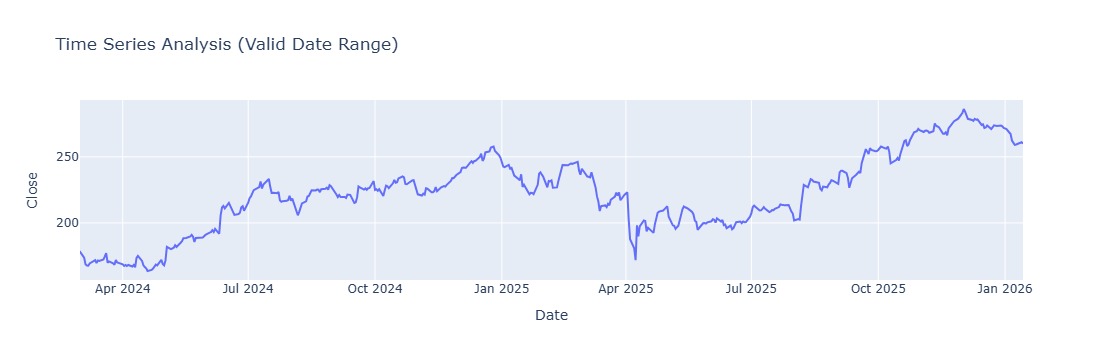

In [22]:
figure = px.line(
    data,
    y="Close",
    range_x=['2024-03-01', '2026-01-14'],
    title="Time Series Analysis (Valid Date Range)"
)
figure.show()


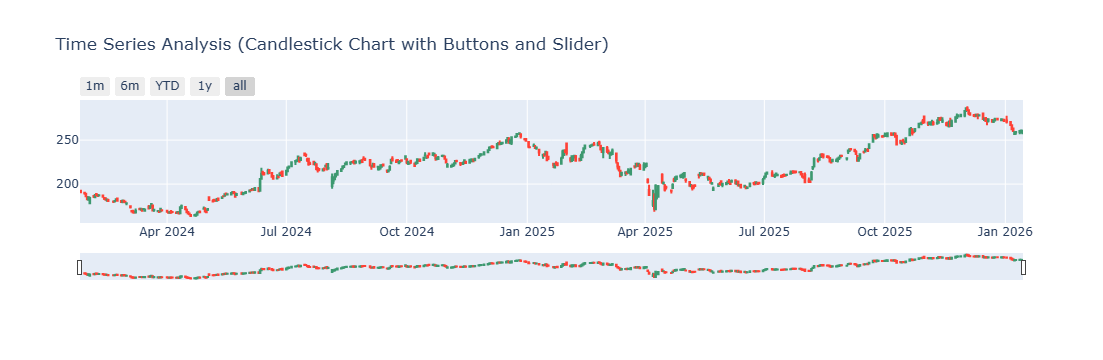

In [23]:
figure = go.Figure(data = [go.Candlestick(x = data.index,
                                        open = data["Open"], 
                                        high = data["High"],
                                        low = data["Low"], 
                                        close = data["Close"])])
figure.update_layout(title = "Time Series Analysis (Candlestick Chart with Buttons and Slider)")

figure.update_xaxes(
    rangeslider_visible = True,
    rangeselector = dict(
        buttons = list([
            dict(count = 1, label = "1m", step = "month", stepmode = "backward"),
            dict(count = 6, label = "6m", step = "month", stepmode = "backward"),
            dict(count = 1, label = "YTD", step = "year", stepmode = "todate"),
            dict(count = 1, label = "1y", step = "year", stepmode = "backward"),
            dict(step = "all")
        ])
    )
)
figure.show()